# **Diamonds Price Prediction**

# About Dataset

The Diamonds dataset is a well-known dataset that contains information about diamonds, including various attributes and their corresponding prices. The purpose of this dataset is to provide a standardized set of data for studying and analyzing the factors that influence diamond prices.

The dataset typically includes the following attributes:

1. Carat Weight: It represents the weight of the diamond, which is a measure of its size.
2. Cut: It describes the quality of the cut, which affects the diamond's brilliance and sparkle. Common values include Fair, Good, Very Good, Premium, and Ideal.
3. Color: It indicates the color of the diamond on a scale from D (colorless) to J (slightly yellow or brown).
4. Clarity: It refers to the presence of internal and external flaws or blemishes within the diamond. The clarity is graded on a scale from IF (internally flawless) to I3 (heavily included).
5. Depth: It represents the depth of the diamond as a percentage of its overall size.
6. Table: It denotes the width of the top facet of the diamond relative to its overall size, expressed as a percentage.
7. Price: It is the price of the diamond in USD, which serves as the target variable for analysis and prediction.

The purpose of analyzing the Diamonds dataset is to understand the relationships between these attributes and the corresponding diamond prices. By exploring this dataset, researchers and analysts can gain insights into how different factors, such as carat weight, cut quality, color, clarity, depth, and table dimensions, contribute to the overall value and market pricing of diamonds. This dataset can be used to build predictive models to estimate diamond prices based on their attributes or to conduct various data exploration and visualization tasks to uncover patterns and trends in the data.

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

pd.set_option('display.max_columns', None)

# Import Data

In [2]:
data = pd.read_csv("drive/MyDrive/INTERN_PREP/supervised learning/dataset/diamonds.csv")
df = data
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Handling Duplicate Data

In [3]:
df.duplicated().any()

False

## Handling Missing Data

In [4]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

## Drop Unnecessary Columns

In [5]:
df = df.drop(columns=["Unnamed: 0"])

# Exploratory Data Analysis (EDA)

In [6]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## 1. Distribution Analysis

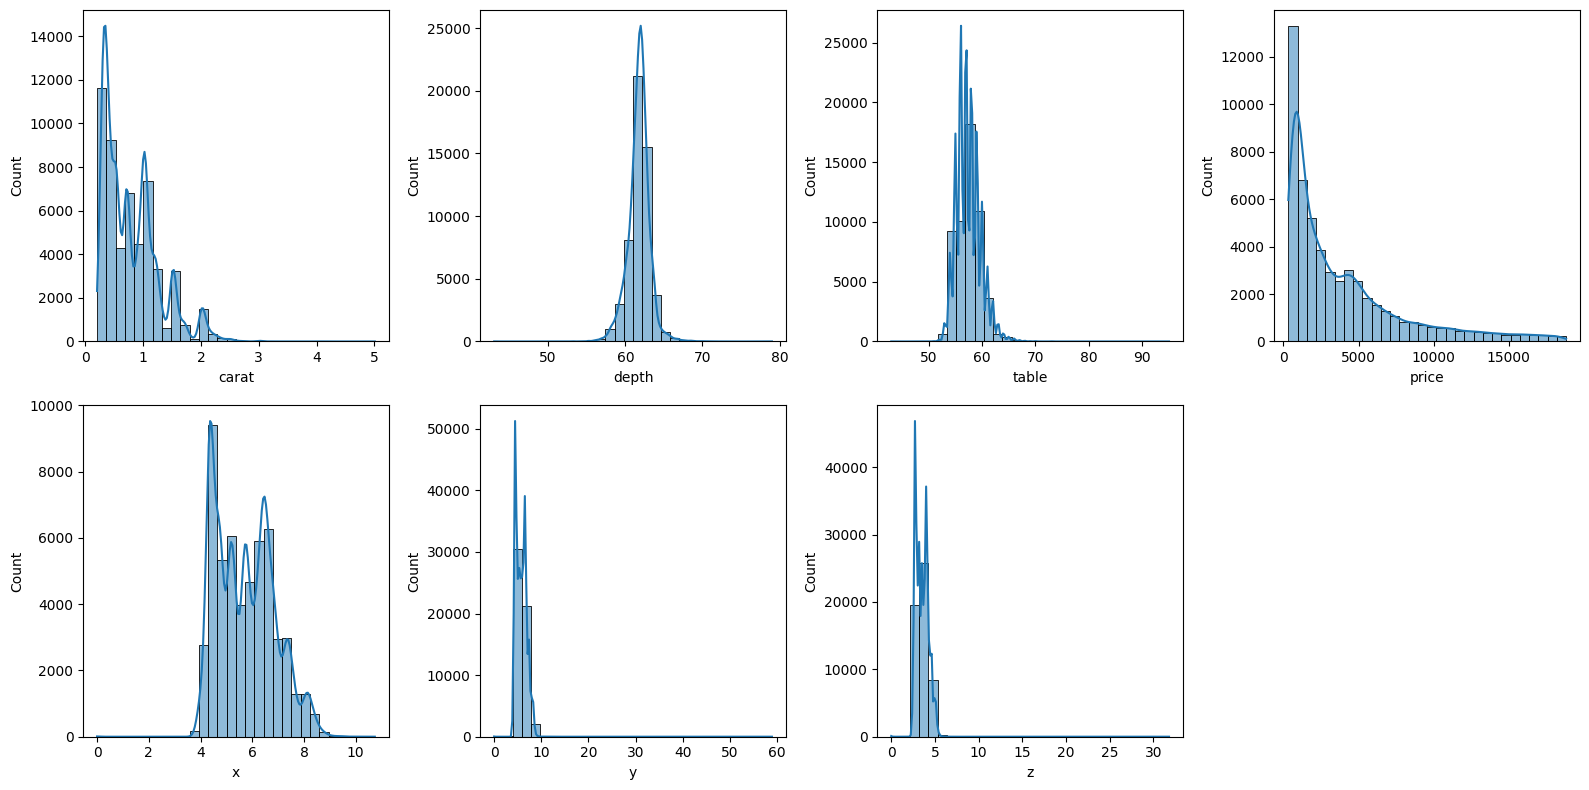

In [9]:
# Plot histograms and kernel density estimation (KDE) for numerical variables
numerical_vars = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

plt.figure(figsize=(16, 8))
for i, var in enumerate(numerical_vars):
    plt.subplot(2, 4, i+1)
    sns.histplot(data=df, x=var, bins=30, kde=True)
plt.tight_layout()
plt.show()

## 2. Price Distribution Analysis

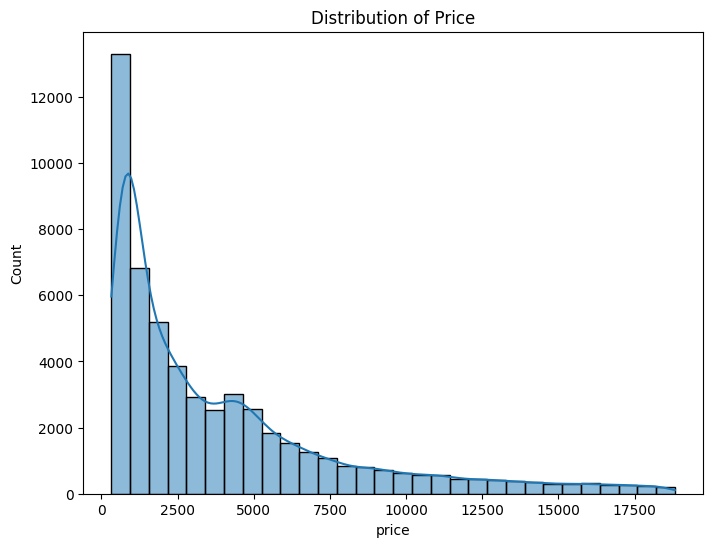

In [10]:
# Plot a histogram and KDE for 'price'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='price', bins=30, kde=True)
plt.title("Distribution of Price")
plt.show()

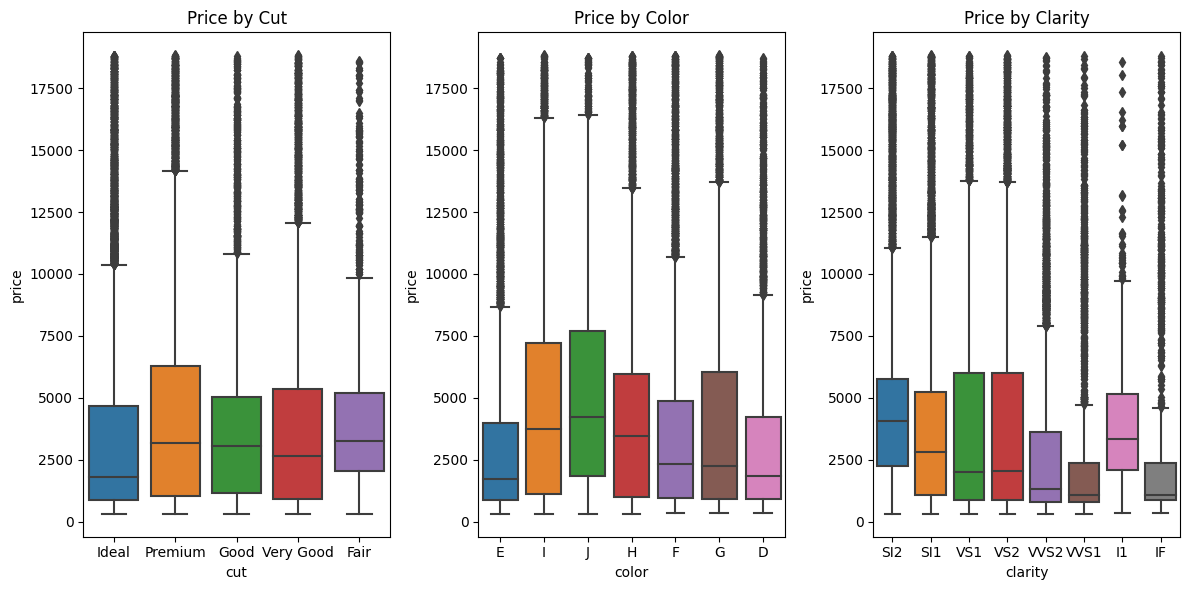

In [11]:
# Box plot of 'price' by 'cut', 'color', and 'clarity'
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='cut', y='price')
plt.title("Price by Cut")

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='color', y='price')
plt.title("Price by Color")

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='clarity', y='price')
plt.title("Price by Clarity")

plt.tight_layout()
plt.show()

## 3. Relationship Analysis

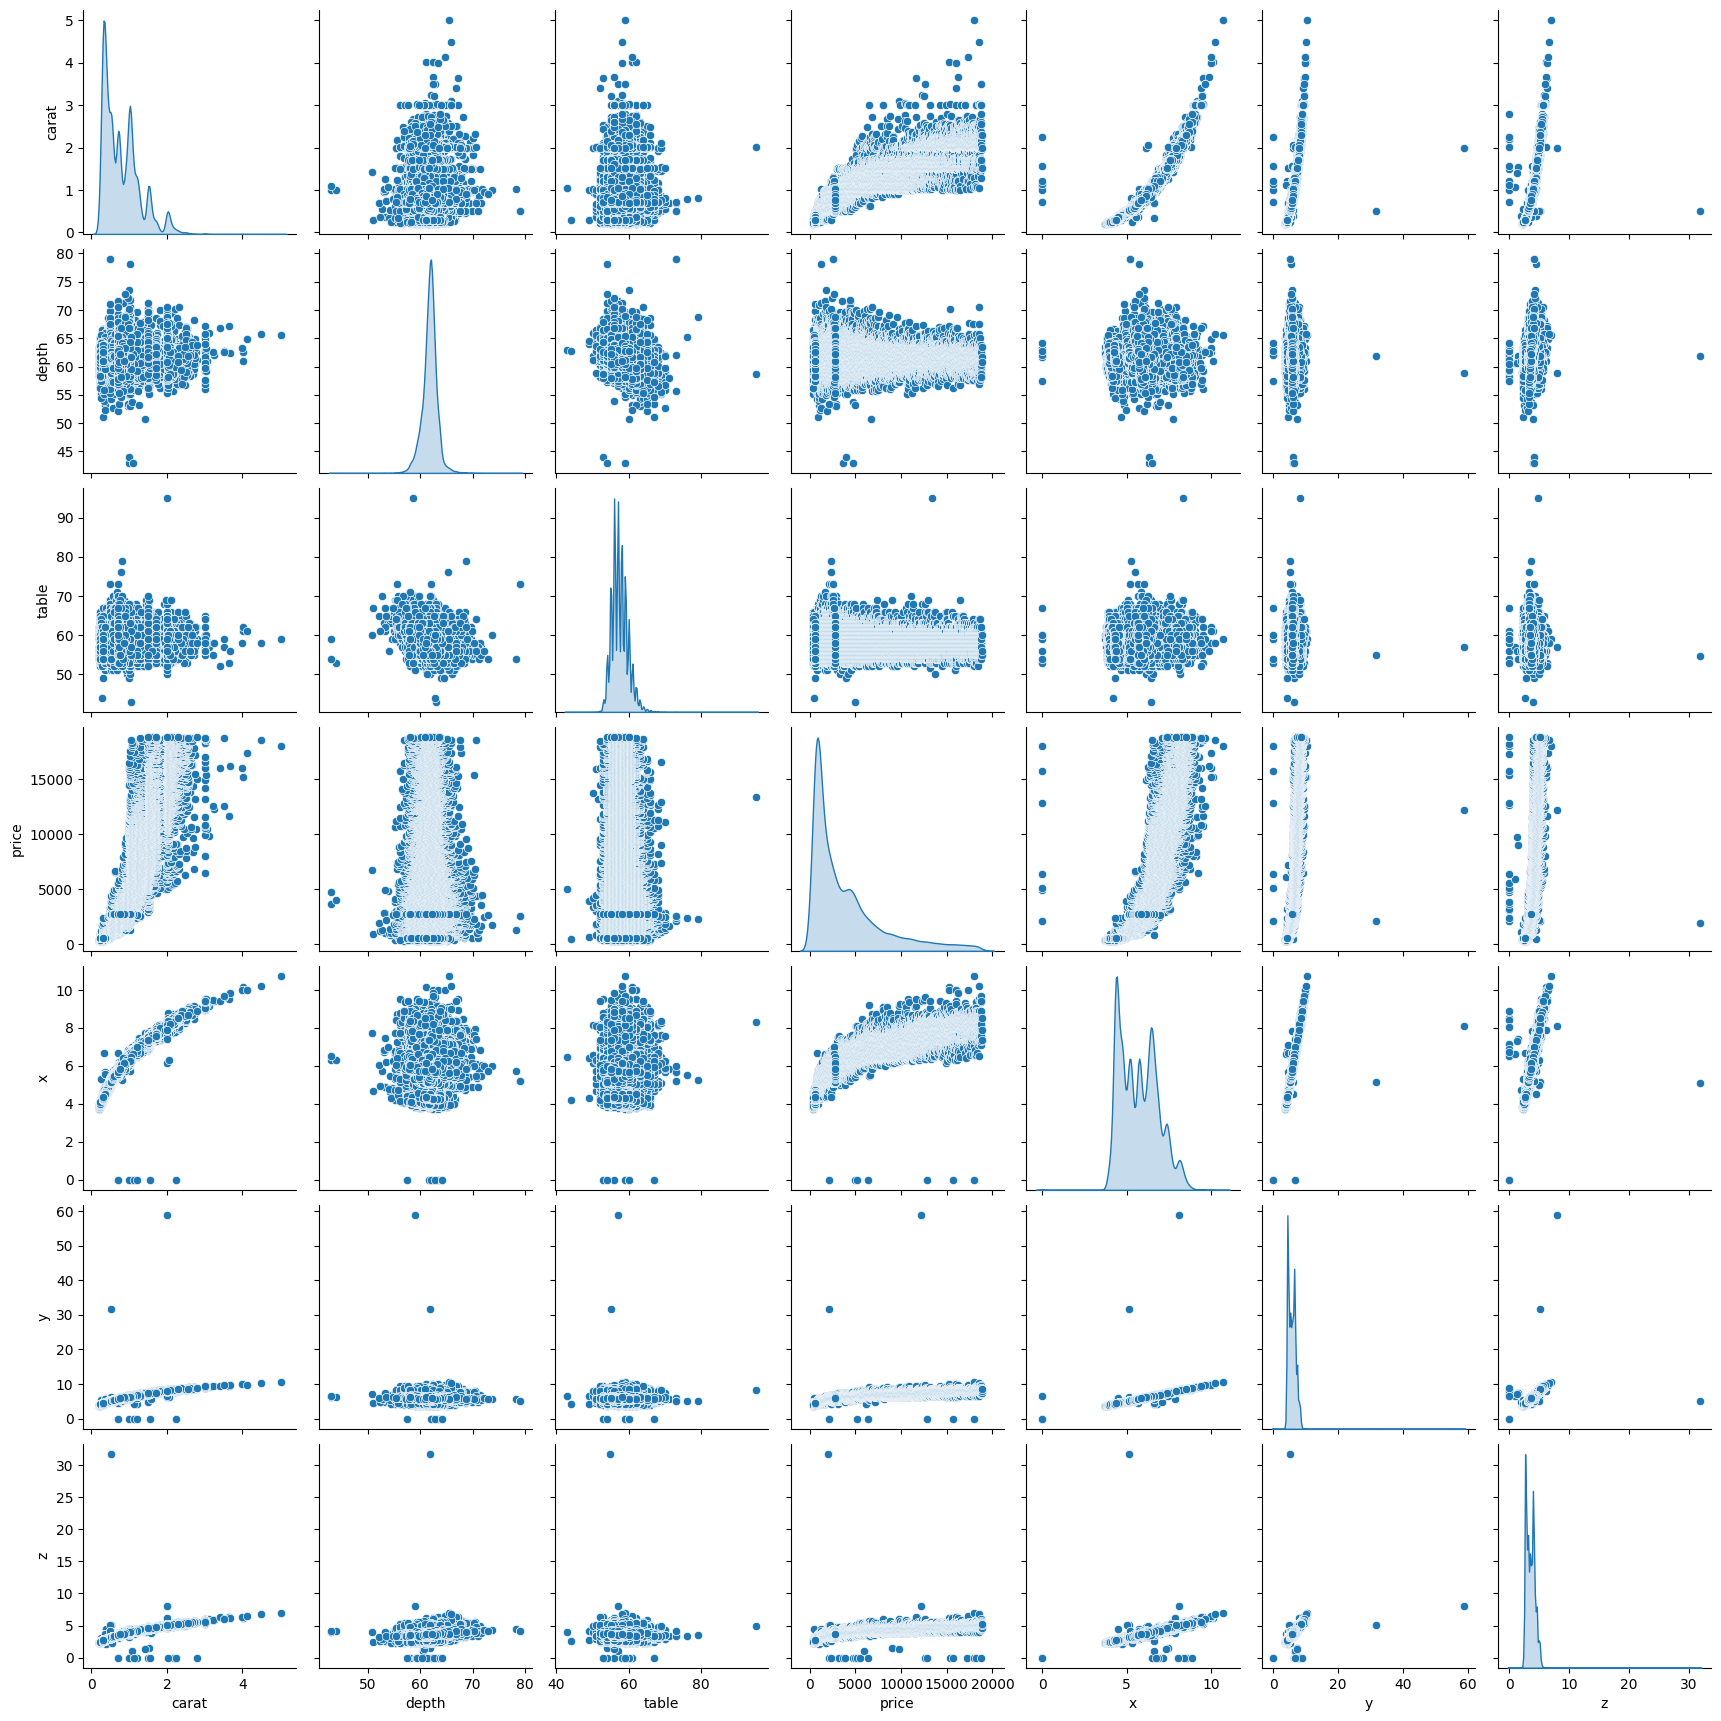

In [12]:
# Pairplot of numerical variables
sns.pairplot(data=df, vars=numerical_vars, diag_kind='kde')
plt.show()

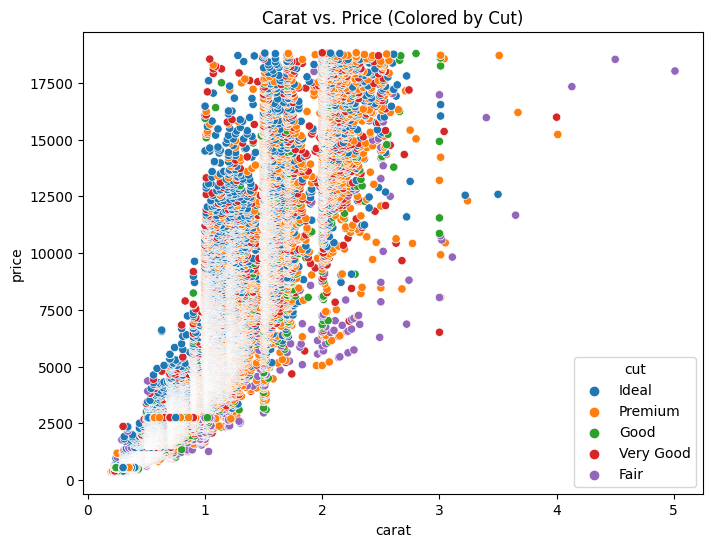

In [13]:
# Scatter plot of 'carat' vs. 'price' colored by 'cut'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='carat', y='price', hue='cut')
plt.title("Carat vs. Price (Colored by Cut)")
plt.show()

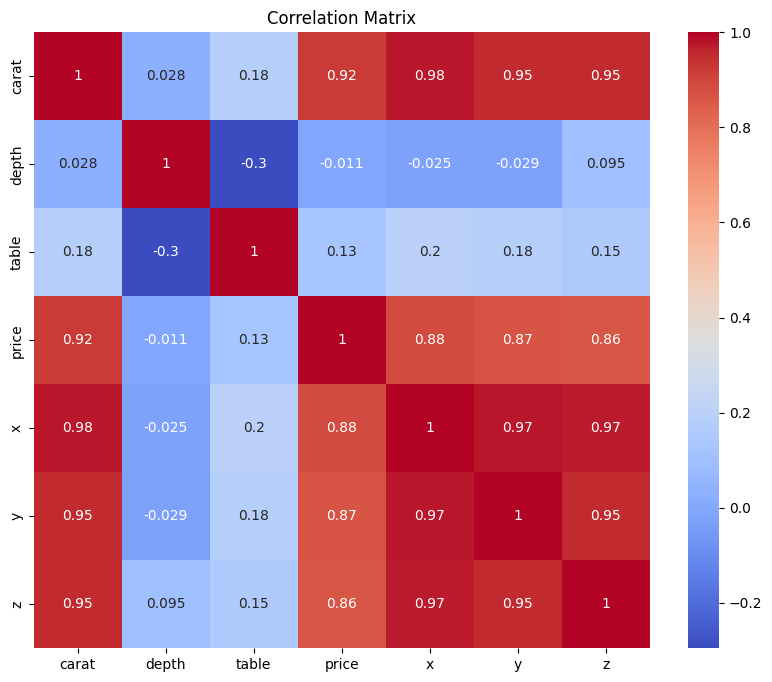

In [14]:
# Heatmap of correlation matrix
corr_matrix = df[numerical_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

## 4. Interactive Visualizations
Utilize interactive visualizations to explore relationships and patterns in the data.

In [15]:
# Interactive scatter plot of 'carat' vs. 'price' with tooltips
import plotly.express as px

fig = px.scatter(df, x='carat', y='price', color='cut',
                 hover_data=['color', 'clarity'])
fig.update_layout(title="Carat vs. Price (Colored by Cut)")
fig.show()

# **Phase 1: Simple Model**

## Feature Engineering

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [17]:
categorical_features = [col for col in df.columns if df[col].dtype == 'object']

for feature in categorical_features:
    unique_categories = df[feature].nunique()
    print(f"'{feature}' features have {unique_categories} categories.")

'cut' features have 5 categories.
'color' features have 7 categories.
'clarity' features have 8 categories.


In [18]:
encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = encoder.fit_transform(df[col])

In [19]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


## Dataset Splitting

In [20]:
X = df.drop(columns="price")
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(48546, 9)
(48546,)
(5394, 9)
(5394,)


## Preprocessor

In [22]:
# Menentukan fitur numerik dan kategorikal
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

# Pipeline untuk transformasi fitur numerik
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline untuk transformasi fitur kategorikal
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

# ColumnTransformer untuk menggabungkan transformasi fitur numerik dan kategorikal
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

## Linear Regression

In [32]:
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lr_param_grid = {
    'regressor__fit_intercept': [True, False]
}

In [33]:
lr_grid_search = GridSearchCV(lr_pipeline, lr_param_grid, cv=5)
lr_grid_search.fit(X_train, y_train)

print("Best parameters: ", lr_grid_search.best_params_)
print("Best cross-validation score: ", lr_grid_search.best_score_)
accuracy = lr_grid_search.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

y_pred_lr = lr_grid_search.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared Score (R2):", r2)

Best parameters:  {'regressor__fit_intercept': True}
Best cross-validation score:  0.9196812980037796
Accuracy on test set:  0.9184458469545096
Mean Absolute Error (MAE): 738.9269503951156
Mean Squared Error (MSE): 1316812.699651797
R-squared Score (R2): 0.9184458469545096


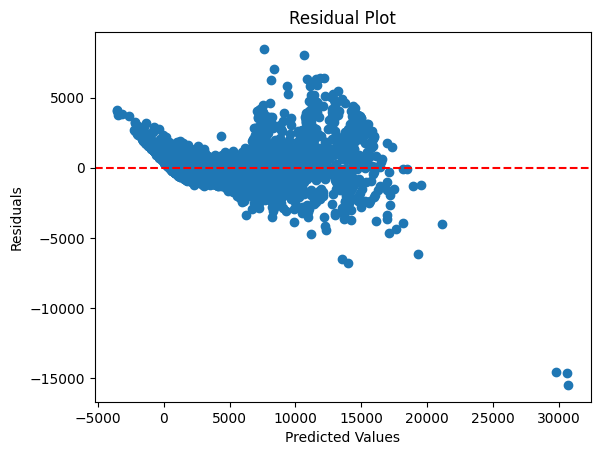

In [34]:
# Residual plot
residuals = y_test - y_pred_lr
plt.scatter(y_pred_lr, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## KNN

In [30]:
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])

knn_param_grid = {
    'regressor__n_neighbors': [7, 9],
    'regressor__weights': ['uniform', 'distance'],
    'regressor__p': [1, 2]
}

In [31]:
knn_grid_search = GridSearchCV(knn_pipeline, knn_param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)

print("Best parameters: ", knn_grid_search.best_params_)
print("Best cross-validation score: ", knn_grid_search.best_score_)
accuracy = knn_grid_search.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

y_pred_knn = knn_grid_search.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_knn)
mse = mean_squared_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared Score (R2):", r2)

Best parameters:  {'regressor__n_neighbors': 7, 'regressor__p': 1, 'regressor__weights': 'distance'}
Best cross-validation score:  0.9697257601691888
Accuracy on test set:  0.97494665659407
Mean Absolute Error (MAE): 320.63383406267303
Mean Squared Error (MSE): 404523.36924232834
R-squared Score (R2): 0.97494665659407


## SVM Regressor

In [26]:
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])

svm_param_grid = {
    'regressor__kernel': ['linear', 'rbf'],
    'regressor__C': [1]
}

In [27]:
svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=4)
svm_grid_search.fit(X_train, y_train)

print("Best parameters: ", svm_grid_search.best_params_)
print("Best cross-validation score: ", svm_grid_search.best_score_)
accuracy = svm_grid_search.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

y_pred = svm_grid_search.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared Score (R2):", r2)

Best parameters:  {'regressor__C': 1, 'regressor__kernel': 'linear'}
Best cross-validation score:  0.8569452469423924
Accuracy on test set:  0.8690287325121265
Mean Absolute Error (MAE): 766.0344346565946
Mean Squared Error (MSE): 2114725.2699850183
R-squared Score (R2): 0.8690287325121265


## Random Forest

In [28]:
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

rf_param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}

In [29]:
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

print("Best parameters: ", rf_grid_search.best_params_)
print("Best cross-validation score: ", rf_grid_search.best_score_)
accuracy = rf_grid_search.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared Score (R2):", r2)

Best parameters:  {'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}
Best cross-validation score:  0.9799815180461025
Accuracy on test set:  0.9824834287849001
Mean Absolute Error (MAE): 766.0344346565946
Mean Squared Error (MSE): 2114725.2699850183
R-squared Score (R2): 0.8690287325121265


## XGBoost

In [33]:
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor())
])

xgb_param_grid = {
    'regressor__learning_rate': [0.1, 0.01, 0.001],
    'regressor__max_depth': [3, 5, 7]
}

In [34]:
xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=5)
xgb_grid_search.fit(X_train, y_train)

print("Best parameters: ", xgb_grid_search.best_params_)
print("Best cross-validation score: ", xgb_grid_search.best_score_)
accuracy = xgb_grid_search.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

y_pred_xgb = xgb_grid_search.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared Score (R2):", r2)

Best parameters:  {'regressor__learning_rate': 0.1, 'regressor__max_depth': 7}
Best cross-validation score:  0.9813505273622422
Accuracy on test set:  0.9821658537670486
Mean Absolute Error (MAE): 277.9164044780116
Mean Squared Error (MSE): 287958.728893896
R-squared Score (R2): 0.9821658537670486


## Elastic Net

In [35]:
elasticnet_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet())
])

elasticnet_param_grid = {
    'regressor__alpha': [0.1, 1.0, 10.0],
    'regressor__l1_ratio': [0.25, 0.5, 0.75]
}

In [36]:
elasticnet_grid_search = GridSearchCV(elasticnet_pipeline, elasticnet_param_grid, cv=5)
elasticnet_grid_search.fit(X_train, y_train)

print("Best parameters: ", elasticnet_grid_search.best_params_)
print("Best cross-validation score: ", elasticnet_grid_search.best_score_)
accuracy = elasticnet_grid_search.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

y_pred_elasticnet = elasticnet_grid_search.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_elasticnet)
mse = mean_squared_error(y_test, y_pred_elasticnet)
r2 = r2_score(y_test, y_pred_elasticnet)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared Score (R2):", r2)

Best parameters:  {'regressor__alpha': 0.1, 'regressor__l1_ratio': 0.75}
Best cross-validation score:  0.901127450844597
Accuracy on test set:  0.9003894704056167
Mean Absolute Error (MAE): 839.2753044598496
Mean Squared Error (MSE): 1608359.6664385698
R-squared Score (R2): 0.9003894704056167


# **Phase 2: Feature Importance**

##Feature Importance

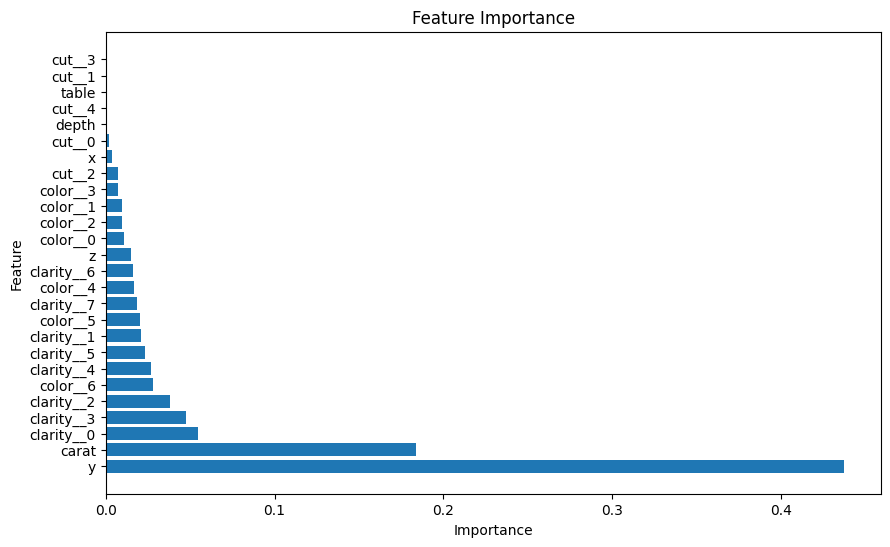

In [37]:
xgb_regressor = xgb_grid_search.best_estimator_.named_steps['regressor']

preprocessor = xgb_grid_search.best_estimator_.named_steps['preprocessor']
encoded_categorical_features = preprocessor.transformers_[1][1].named_steps['onehot'].categories_
encoded_categorical_feature_names = [
    f"{feature}__{value}"
    for feature, values in zip(categorical_features, encoded_categorical_features)
    for value in values
]
preprocessed_features = numeric_features + encoded_categorical_feature_names

feature_importance = xgb_regressor.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': preprocessed_features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [41]:
feature_importance = ['carat', 'color', 'clarity', 'y', 'price']

df_feature_importance = df[feature_importance].copy()
df_feature_importance.head()

,carat,color,clarity,y,price
0,0.23,1,3,3.98,326
1,0.21,1,2,3.84,326
2,0.23,1,4,4.07,327
3,0.29,5,5,4.23,334
4,0.31,6,3,4.35,335


## Dataset Splitting

In [42]:
X = df_feature_importance.drop(columns="price")
y = df_feature_importance['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Preprocessor

In [43]:
# Menentukan fitur numerik dan kategorikal
numeric_features = ['carat', 'y']
categorical_features = ['color', 'clarity']

# Pipeline untuk transformasi fitur numerik
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline untuk transformasi fitur kategorikal
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

# ColumnTransformer untuk menggabungkan transformasi fitur numerik dan kategorikal
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

## Linear Regression

In [44]:
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lr_param_grid = {
    'regressor__fit_intercept': [True, False]
}

In [45]:
lr_grid_search = GridSearchCV(lr_pipeline, lr_param_grid, cv=5)
lr_grid_search.fit(X_train, y_train)

print("Best parameters: ", lr_grid_search.best_params_)
print("Best cross-validation score: ", lr_grid_search.best_score_)
accuracy = lr_grid_search.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

y_pred_lr = lr_grid_search.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared Score (R2):", r2)

Best parameters:  {'regressor__fit_intercept': True}
Best cross-validation score:  0.914602202276129
Accuracy on test set:  0.9151121753030272
Mean Absolute Error (MAE): 784.0538018156749
Mean Squared Error (MSE): 1370639.7704165734
R-squared Score (R2): 0.9151121753030272


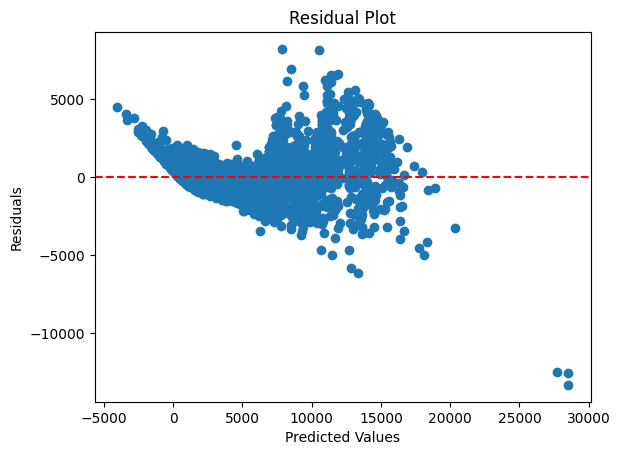

In [46]:
# Residual plot
residuals = y_test - y_pred_lr
plt.scatter(y_pred_lr, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# **Phase 3: Polynomial Features**

## Linear Regression

In [47]:
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('polynomial_features', PolynomialFeatures()),
    ('regressor', LinearRegression())
])

lr_param_grid = {
    'polynomial_features__degree': [2, 3],
    'regressor__fit_intercept': [True, False]
}

In [48]:
lr_grid_search = GridSearchCV(lr_pipeline, lr_param_grid, cv=5)
lr_grid_search.fit(X_train, y_train)

print("Best parameters: ", lr_grid_search.best_params_)
print("Best cross-validation score: ", lr_grid_search.best_score_)
accuracy = lr_grid_search.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

y_pred_lr = lr_grid_search.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared Score (R2):", r2)

Best parameters:  {'polynomial_features__degree': 2, 'regressor__fit_intercept': True}
Best cross-validation score:  0.9059516354323762
Accuracy on test set:  0.9687601032809293
Mean Absolute Error (MAE): 429.23740685616684
Mean Squared Error (MSE): 504414.4436462568
R-squared Score (R2): 0.9687601032809293


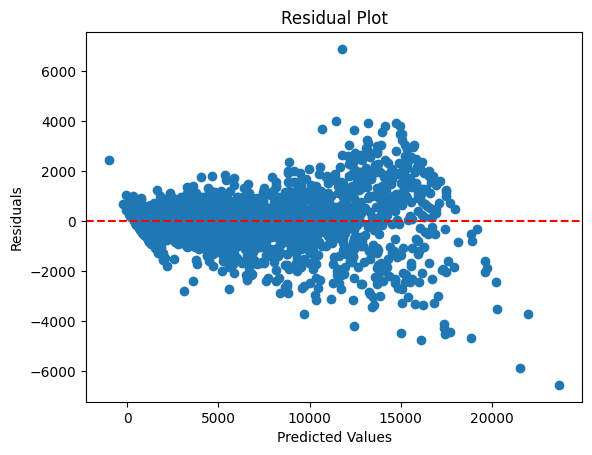

In [49]:
# Residual plot
residuals = y_test - y_pred_lr
plt.scatter(y_pred_lr, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## XGBoost

In [79]:
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('polynomial_features', PolynomialFeatures()),
    ('regressor', XGBRegressor())
])

xgb_param_grid = {
    'polynomial_features__degree': [2],
    'regressor__learning_rate': [0.1],
    'regressor__max_depth': [7]
}

In [80]:
xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=2)
xgb_grid_search.fit(X_train, y_train)

print("Best parameters: ", xgb_grid_search.best_params_)
print("Best cross-validation score: ", xgb_grid_search.best_score_)
accuracy = xgb_grid_search.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

y_pred_xgb = xgb_grid_search.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared Score (R2):", r2)

Best parameters:  {'polynomial_features__degree': 2, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 7}
Best cross-validation score:  0.9798007098625872
Accuracy on test set:  0.9812475603229616
Mean Absolute Error (MAE): 285.412563800635
Mean Squared Error (MSE): 302785.9378590396
R-squared Score (R2): 0.9812475603229616


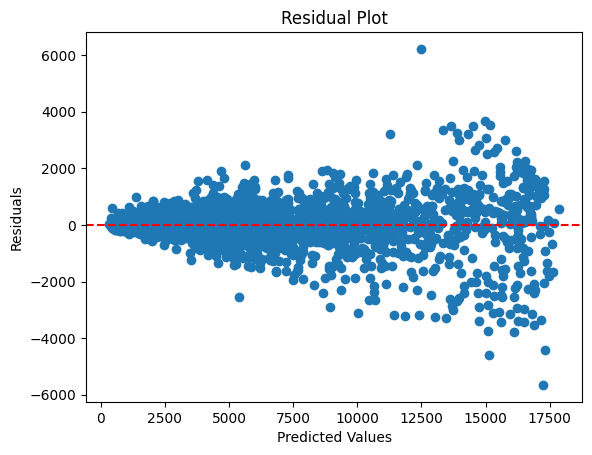

In [81]:
# Residual plot
residuals = y_test - y_pred_xgb
plt.scatter(y_pred_xgb, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# **Phase 4: Fine Tuning**

In [23]:
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('polynomial_features', PolynomialFeatures()),
    ('regressor', XGBRegressor())
])

xgb_param_grid = {
    'polynomial_features__degree': [2, 3, 4],
    'regressor__learning_rate': [0.1],
    'regressor__max_depth': [7],
}


In [ ]:
xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=4)
xgb_grid_search.fit(X_train, y_train)

print("Best parameters: ", xgb_grid_search.best_params_)
print("Best cross-validation score: ", xgb_grid_search.best_score_)
accuracy = xgb_grid_search.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

y_pred_xgb = xgb_grid_search.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared Score (R2):", r2)

In [ ]:
# Residual plot
residuals = y_test - y_pred_xgb
plt.scatter(y_pred_xgb, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Insight From Data / Business Recommendation

Business Recommendation:

1. Pricing Strategy Optimization: Based on the analysis of the Diamonds dataset, it is evident that various factors such as carat weight, cut quality, color, clarity, depth, and table dimensions significantly influence diamond prices. To optimize your pricing strategy, consider incorporating these factors into your pricing model. By accurately assessing the quality and characteristics of each diamond, you can price them accordingly, aligning the price with the perceived value.

2. Market Segmentation: Use the insights from the dataset to segment your market and target specific customer groups. For example, customers looking for high-quality diamonds with excellent cut and clarity might be willing to pay a premium price. On the other hand, there may be a market segment that values larger carat weights over other attributes. By understanding customer preferences and needs, you can tailor your marketing strategies and product offerings to effectively target each segment.

3. Product Differentiation: Leverage the dataset insights to differentiate your diamond offerings from competitors. Highlight the unique characteristics and attributes of your diamonds that align with customer preferences. For instance, if the dataset reveals that customers value diamonds with a specific color or cut quality, emphasize those features in your marketing campaigns to attract potential buyers.

4. Education and Transparency: Many customers may not be familiar with the nuances of diamond grading. Use the dataset insights to educate your customers about the factors that affect diamond prices. Provide transparency in your pricing by explaining how each attribute contributes to the overall value of the diamond. This approach can build trust with customers and establish your brand as a knowledgeable and reliable source for diamond purchases.

5. Continuous Data Analysis: The diamond market is dynamic, and customer preferences may change over time. To stay competitive, continue analyzing data on diamond sales and prices. Monitor market trends, emerging preferences, and shifts in demand patterns. Regularly update your pricing and product offerings based on the latest insights to adapt to changing market dynamics.

